<a href="https://colab.research.google.com/github/kwyvanessa/Datathon_2022/blob/update_datasource/Datathon_2022_Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datathon 2022

## Problem Statement

Preliminary Problem Statement:  What are the three most influential indicators of the gender pay gap 

# Datasets

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

## UN Human Development Reports data
https://hdr.undp.org/data-center <br>

[Data Dictionary](https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Composite_indices_metadata.xlsx) <br>

This dataset includes time series data for several UN HDC indices and supporting measurements in a single tabular file.  <br>
<br>
Glossary of column prefixes <br>
hdi: Human Development Index<br>
le: life expectancy<br>
gnipc: Gross National Income per capita<br>
mys: Mean years of schooling<br>
eys: Expected Years of Schooling<br>
gdi:  Gender Development Index<br>
gii: Gender inequality index<br>
mmr: Material mortality rate<br>
abr: Adolescent birth rate <br>
se: population with atleast some secondary ed<br>
pr: share of seats in parliament<br>
lfpr: labor force participation rate<br>
phdi: planetary pressures adjusted HDI<br>
co2_prod: Co2 emissions per capita

### Original UNHDR Dataset Import

In [4]:
# Read in the UN HDR data using pandas and preview the DF

#url1 = "https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Composite_indices_complete_time_series.csv"

#Use requests package to read csv from url
#r = requests.get(url1)
#open('temp.csv', 'wb').write(r.content)
#hdrDF = pd.read_csv('temp.csv')
#hdrDF.sample(10)

#### Dataframe Slicing
The initial dataframe contains 1008 columns.  This isn't easy to filter since the year is in the column name.

The following two custom functions make it easy to extract a subset of the columns in two ways<br>.  
1: Select all the indicators in the datset for just a single year.  Each indicator is a column<br>
2: Select a single indicator and generate a dataframe with each year as a column

In [5]:
# Create an arrays of column headers to feed into the custom forumulas
# base_cols are the columns that do not have time series suffixes, or only have a single year's data
#base_cols = ['iso3', 'country', 'hdicode', 'region', 'hdi_rank_2021','rankdiff_hdi_phdi_2021']
#prefixes = ['hdi', 'hdi_f','hdi_m','le','le_f','le_m','gnipc','gni_pc_f','gni_pc_m','mys','mys_m','mys_f','eys','eys_f','eys_m','gdi', 'gii','mmr','abr','se_f','se_m','pr_f','lfpr_f','lfpr_m','phdi','co2_prod' ] # a list of the short names of the columns to be selected from the full dataset


##### Slicing by Year

In [6]:
# Define a custom function to create a dataframe of indicators for a given year
#def yearslice(base_cols, prefixes, year):
#  year_cols = [x + '_' + year for x in prefixes] # an array of column names for filtering
#  columns = base_cols + year_cols
#  df = hdrDF.loc[:,columns]
#  return df


In [7]:
# Create a sliced dataframe for a given year using the custom function

#year = '2021'

#hdr_21 = yearslice(base_cols,prefixes,year)
#hdr_21.sample(10)

##### Slicing by Indicator

In [8]:
# Define a custom function to create a timeseries dataframe for a given indicator
#def ind_slice(indicator, years):
#  ind_cols = [indicator + '_'+ str(x) for x in years]
#  columns = base_cols + ind_cols
#  df = hdrDF.loc[:,columns]
#  return df


In [9]:
# Create a timeseries DF for a specific indicator (maybe helpful for viz)
#indicator = 'hdi'
#years = range(2010,2022)
#hdi_ts = ind_slice(indicator,years)
#hdi_ts.sample(10)

### Import Transformed UNHDR Data

In [19]:
# Use curl to retrieve transformed csv file from github repo and save in Colab working director
!curl -O "https://raw.githubusercontent.com/kwyvanessa/Datathon_2022/main/hdrDF_by_year_data.csv"
# Read in the csv from the Colabl working directory
hdr_y = pd.read_csv("/content/hdrDF_by_year_data.csv")
hdr_y.sample(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2023k  100 2023k    0     0   9.9M      0 --:--:-- --:--:-- --:--:--  9.9M


,Unique id,iso3,hdicode,region,hdi_rank_2021,gdi_group_2021,gii_rank_2021,rankdiff_hdi_phdi_2021,Year,phdi,...,gnipc,gni pc m,gni pc f,gii,gdi,eys m,eys f,eys,diff hdi phdi,abr
3377,NIC_2006,NIC,Medium,LAC,126.0,2.0,102.0,19.0,1/1/2006,0.574,...,4320.551335,6325.980865,2372.894944,0.533,0.937,10.580857,11.266810,10.917882,3.204047,102.927
411,GRC_2010,GRC,Very High,NaN,33.0,2.0,32.0,22.0,1/1/2010,0.736,...,32426.759080,41058.765700,24002.982720,0.152,0.965,16.745800,16.781910,16.759569,15.304948,10.453
3300,KIR_2004,KIR,Medium,EAP,136.0,NaN,NaN,NaN,1/1/2004,NaN,...,2975.522746,NaN,NaN,NaN,NaN,11.595170,12.746200,12.156140,NaN,41.023
372,ARG_2011,ARG,Very High,LAC,47.0,1.0,69.0,26.0,1/1/2011,0.750,...,23944.355100,31740.232660,16324.095840,0.362,0.991,16.091789,18.263990,17.173830,10.820452,68.264
4730,CPV_2010,CPV,Medium,SSA,128.0,1.0,84.0,NaN,1/1/2010,NaN,...,5928.474752,7701.945646,4168.720874,NaN,0.978,12.439550,13.162010,12.797460,NaN,78.974
2168,PRY_2016,PRY,High,LAC,105.0,1.0,111.0,5.0,1/1/2016,0.655,...,11681.903190,15156.261120,8169.208891,0.455,0.974,12.350192,13.225385,12.769875,9.153953,75.452
2557,DNK_2018,DNK,Very High,NaN,6.0,1.0,1.0,0.0,1/1/2018,0.787,...,57549.145840,66761.453250,48444.955160,0.022,0.983,18.170210,19.437679,18.793699,16.454352,2.495
6114,DJI_2012,DJI,Low,AS,171.0,NaN,NaN,-7.0,1/1/2012,0.438,...,3807.416605,6059.971698,1576.003385,NaN,NaN,6.537464,6.524488,6.530976,8.368201,24.386
1841,HKG_2007,HKG,Very High,NaN,4.0,1.0,NaN,NaN,1/1/2007,NaN,...,50586.268310,67673.729490,35020.288080,NaN,0.954,15.243007,15.168670,15.205839,NaN,3.305
3459,BGD_1992,BGD,Medium,SA,129.0,5.0,131.0,25.0,1/1/1992,0.410,...,1624.953140,2622.520808,577.480512,0.721,0.679,7.022924,5.370862,6.213611,0.726392,167.401


In [21]:
hdr_y.columns

Index(['Unique id', 'iso3', 'hdicode', 'region', 'hdi_rank_2021',
       'gdi_group_2021', 'gii_rank_2021', 'rankdiff_hdi_phdi_2021', 'Year',
       'phdi', 'country', 'hdi', 'coef ineq', 'se m', 'se f', 'pr m', 'pr f',
       'mys m', 'mys f', 'mys', 'mmr', 'mf', 'loss', 'lfpr m', 'lfpr f',
       'le m', 'le f', 'le', 'ineq le', 'ineq inc', 'ineq', 'ihdi', 'hdi m',
       'hdi f', 'gnipc', 'gni pc m', 'gni pc f', 'gii', 'gdi', 'eys m',
       'eys f', 'eys', 'diff hdi phdi', 'abr'],
      dtype='object')

## World Bank: Women Business and Law data
[Website](https://wbl.worldbank.org/en/wbl-data)<br>
This dataset includes timeseries data for various indices of the interaction between inequality of opportunity for women and labor market dynamics<br>

Timeseries data is available for 1971 to 2022<br>
Measurements are aggregated into the following composite indices<br>
WBL Index (aggregates all)<br>
Mobility<br>
Workplace<br>
PAY<br>
MARRIAGE<br>
PARENTHOOD<br>
ENTREPRENEURSHIP<br>
ASSETS<br>
PENSION

In [14]:
# Use curl to get csv file from github repo and save in Colab working directory
#!curl -O "https://raw.githubusercontent.com/kwyvanessa/Datathon_2022/main/WBL_1971-2022.csv"
# Read in the csv from the working directory
#wbl_all = pd.read_csv("/content/WBL_1971-2022.csv")
#wbl_all.sample(10)

In [ ]:
# Select only index columns from imported wbl dataset
#wbl = wbl_all.loc[:,['Economy','ISO Code','Region','Report Year','WBL INDEX','MOBILITY','WORKPLACE','PAY','MARRIAGE','PARENTHOOD','ENTREPRENEURSHIP','ASSETS','PENSION']]
#wbl.sample(10)

,Economy,ISO Code,Region,Report Year,WBL INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTREPRENEURSHIP,ASSETS,PENSION
8712,Tajikistan,TJK,Europe & Central Asia,1999,70.0,100,50,25,80,80,75,100,50
8666,"Taiwan, China",TWN,East Asia & Pacific,2005,80.0,100,100,50,100,40,75,100,75
1746,Chile,CHL,High income: OECD,2001,60.6,100,25,75,40,60,75,60,50
8444,Suriname,SUR,Latin America & Caribbean,1991,63.8,100,25,75,60,0,50,100,100
5548,Marshall Islands,MHL,East Asia & Pacific,2007,53.8,100,25,75,80,0,75,0,75
5517,Marshall Islands,MHL,East Asia & Pacific,1976,53.8,100,25,75,80,0,75,0,75
70,Albania,ALB,Europe & Central Asia,1989,59.4,100,25,75,80,20,75,100,0
7757,Singapore,SGP,East Asia & Pacific,1980,51.9,75,25,25,60,0,75,80,75
4438,Kazakhstan,KAZ,Europe & Central Asia,1989,58.1,100,25,0,80,60,75,100,25
5018,Liberia,LBR,Sub-Saharan Africa,1997,63.8,100,25,75,80,0,75,80,75


## UN Women Data Hub Wage Data

In [16]:
# Use curl to get csv file from github repo and save in Colab working directory
!curl -O "https://raw.githubusercontent.com/kwyvanessa/Datathon_2022/main/UNWDH_wages_all.csv"
# Read in the csv from the working directory
wagesDF = pd.read_csv("/content/UNWDH_wages_all.csv", usecols = ['REF_AREA Description','TIME_PERIOD','OBS_VALUE','Sex'	])
#rename columns
wagesDF.rename({'REF_AREA Description': 'Country', 'TIME_PERIOD': 'Year', 'OBS_VALUE': 'avgHrlyWage'},axis=1, inplace = True) 
#Filter the data
wagesDF = wagesDF.loc[wagesDF['Sex'].isin(['Female','Male'])]
wagesDF.sample(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  629k  100  629k    0     0  6770k      0 --:--:-- --:--:-- --:--:-- 6698k


,Country,Year,avgHrlyWage,Sex
674,Malawi,2013,189.9,Female
407,Venezuela (Bolivarian Republic of),2001,1590.0,Male
293,Portugal,2011,4.5,Female
1160,Finland,2014,17.8,Female
468,Mauritius,2011,93.0,Male
1303,Iceland,2014,3110.0,Male
248,Peru,2005,3.3,Female
68,Togo,2015,537.6,Female
749,Argentina,2011,21.5,Male
1153,Eswatini,2016,25.5,Female


In [17]:
#Pivot the data
wagesDF_wide_mi = wagesDF.pivot(index = ['Country', 'Year'], columns = 'Sex', values = ['avgHrlyWage'])
#drop the multilevel column index
wagesDF_wide_mi.columns = wagesDF_wide_mi.columns.droplevel(0)
#remove the multilevel index
wagesDF_wide = wagesDF_wide_mi.reset_index()
wagesDF_wide.sample(10)

Sex,Country,Year,Female,Male
58,Bosnia and Herzegovina,2015,3.9,4.2
39,Bolivia (Plurinational State of),2005,6.5,7.3
355,Peru,2007,4.1,4.9
115,Costa Rica,2016,3099.2,2822.9
451,Uruguay,2006,52.0,58.9
256,Jamaica,2002,127.0,150.0
366,Portugal,2009,4.4,4.9
470,Venezuela (Bolivarian Republic of),2005,3091.0,3257.0
90,Chad,2018,1171.2,1084.9
269,Luxembourg,2014,22.2,23.4


In [18]:
# Add a new calculated field for the ratio of Female wages in a given year and country as a percentage of Male wages
wagesDF_wide['Wage Ratio'] = wagesDF_wide['Female'] / wagesDF_wide['Male']
wagesDF_wide.sample(10)

Sex,Country,Year,Female,Male,Wage Ratio
325,Panama,2011,3.6,3.5,1.028571
314,Nicaragua,2014,40.9,42.0,0.973810
407,South Africa,2019,19.0,21.0,0.904762
384,Republic of Korea,2017,14890.0,22246.0,0.669334
273,Malaysia,2011,9.3,9.3,1.000000
138,Dominican Republic,2010,75.2,76.5,0.983007
233,Honduras,2017,41.6,33.5,1.241791
219,Honduras,2002,19.8,19.2,1.031250
403,Slovakia,2019,6.9,8.3,0.831325
339,Paraguay,2011,8706.5,9242.4,0.942017


## Merge Dataframes

In [34]:
# Compare country column from each dataframe
print(wagesDF_wide['Country'].nunique())
wagesDF_wide['Country'].unique()


102


array(['Albania', 'Argentina', 'Armenia', 'Austria', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Chad', 'Chile', 'Colombia', 'Costa Rica',
       'Croatia', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia',
       'Eswatini', 'Finland', 'France', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Jordan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon',
       'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Mali', 'Malta', 'Mauritius', 'Mexico', 'Mongolia',
       'Montenegro', 'Myanmar', 'Nepal', 'Netherlands', 'Nicaragua',
       'North Macedonia', 'Norway'

In [40]:
print(hdr_y['country'].nunique())
hdr_y['country'].sort_values().unique()

206


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Arab States', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Congo (Democratic Republic of the)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia and the Pacific', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini (Kingdom of)', 'Ethiopia', 'Europe and Central Asia',
       'Fiji', 'Finland

In [45]:
# Rename country values to prepare for merge
wagesDF_wide.loc[wagesDF_wide['Country'] == 'Republic of Korea'] = 'Korea (Republic of)'
wagesDF_wide.loc[wagesDF_wide['Country'] == 'United Kingdom of Great Britain and Northern Ireland'] = 'United Kingdom'
hdr_y.loc[hdr_y['country'] == 'Eswatini (Kingdom of)'] = 'Eswatini'


In [ ]:
# Join the two datasets
# Note that the UN HDR data has 206 countries, while the UN Wage data is only available for 106 countries
unhdr = pd.merge(hdr_y, wagesDF, how = 'inner')

## Export datasets for viz

In [ ]:
# Comment out if don't want to export files
#hdrDF.to_csv("/content/hdrDF.csv")
#hdr_21.to_csv("/content/hdr_21.csv")
#hdi_ts.to_csv("/content/hdi_ts.csv")
#wbl.to_csv("/content/wbl.csv")
#wagesDF_wide.to_csv("/content/wages.csv")
#hdr_y.to_csv("/content/hdr_y.csv")

UN Human Development Reports data - hdrDF

##### World Bank: Women Business and Law data - wbl

##### UN Women Data Hub Wage Data - wagesDF






# Shapes and Sizes

In [ ]:
# rows and columns of dataframe
wagesDF_shape = wagesDF.shape 
wagesDFW_shape = wagesDF_wide.shape         
hdrDF_shape = hdrDF.shape            
wbl_all_shape = wbl_all.shape       
wbl_idxd_shape = wbl.shape          

print(f"Shapes for dataframes: \n\
         UN Women Data shape {wagesDF_shape} and wide {wagesDFW_shape}\n \
        Human Development Data shape {hdrDF_shape}\n \
        World Business & Law Data shape all {wbl_all_shape} and indexed {wbl_idxd_shape}")

Shapes for dataframes: 
         UN Women Data shape (970, 4) and wide (485, 5)
         Human Development Data shape (206, 1008)
         World Business & Law Data shape all (9880, 55) and indexed (9880, 13)


In [ ]:
# size of dataframes
wagesDF_size = wagesDF.size
wagesDFW_size = wagesDF_wide.size  
hdrDF_size = hdrDF.size  
wbl_all_size = wbl_all.size 
wbl_idxd_size = wbl.size    

print(f"Sizes for dataframes: \n\
         UN Women Data size {wagesDF_size} and {wagesDFW_size}\n \
        Human Development Data shape {hdrDF_size}\n \
        World Business & Law Data shape all {wbl_all_size} and indexed {wbl_idxd_size}")

Sizes for dataframes: 
         UN Women Data size 3880 and 2425
         Human Development Data shape 207648
         World Business & Law Data shape all 543400 and indexed 128440


#Column names and info - summary of dataframe

In [ ]:
wagesDF.columns

Index(['Country', 'Year', 'avgHrlyWage', 'Sex'], dtype='object')

In [ ]:
wagesDF_wide.columns

Index(['Country', 'Year', 'Female', 'Male', 'Wage Ratio'], dtype='object', name='Sex')

In [ ]:
hdrDF.columns

Index(['iso3', 'country', 'hdicode', 'region', 'hdi_rank_2021', 'hdi_1990',
       'hdi_1991', 'hdi_1992', 'hdi_1993', 'hdi_1994',
       ...
       'mf_2012', 'mf_2013', 'mf_2014', 'mf_2015', 'mf_2016', 'mf_2017',
       'mf_2018', 'mf_2019', 'mf_2020', 'mf_2021'],
      dtype='object', length=1008)

In [ ]:
wbl_all.columns

Index(['Economy', 'Economy Code', 'ISO Code', 'Region', 'Income Group',
       'Report Year', 'WBL INDEX', 'MOBILITY',
       'Can a woman choose where to live in the same way as a man?',
       'Can a woman travel outside her home in the same way as a man?',
       'Can a woman apply for a passport in the same way as a man?',
       'Can a woman travel outside the country in the same way as a man?',
       'WORKPLACE', 'Can a woman get a job in the same way as a man?',
       'Does the law prohibit discrimination in employment based on gender?',
       'Is there legislation on sexual harassment in employment?',
       'Are there criminal penalties or civil remedies for sexual harassment in employment?',
       'PAY',
       'Does the law mandate equal remuneration for work of equal value?',
       'Can a woman work at night in the same way as a man?',
       'Can a woman work in a job deemed dangerous in the same way as a man?',
       'Can a woman work in an industrial job in the sam

In [ ]:
wbl.columns

Index(['Economy', 'ISO Code', 'Region', 'Report Year', 'WBL INDEX', 'MOBILITY',
       'WORKPLACE', 'PAY', 'MARRIAGE', 'PARENTHOOD', 'ENTREPRENEURSHIP',
       'ASSETS', 'PENSION'],
      dtype='object')

In [ ]:
wagesDF.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      1462 non-null   object 
 1   Year         1462 non-null   int64  
 2   avgHrlyWage  1462 non-null   float64
 3   Sex          1462 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 45.8+ KB


In [ ]:
wagesDF_wide.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     485 non-null    object 
 1   Year        485 non-null    int64  
 2   Female      485 non-null    float64
 3   Male        485 non-null    float64
 4   Wage Ratio  485 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.1+ KB


In [ ]:
hdrDF.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Columns: 1008 entries, iso3 to mf_2021
dtypes: float64(1004), object(4)
memory usage: 1.6+ MB


In [ ]:
wbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9880 entries, 0 to 9879
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Economy           9880 non-null   object 
 1   ISO Code          9880 non-null   object 
 2   Region            9880 non-null   object 
 3   Report Year       9880 non-null   int64  
 4   WBL INDEX         9880 non-null   float64
 5   MOBILITY          9880 non-null   int64  
 6   WORKPLACE         9880 non-null   int64  
 7   PAY               9880 non-null   int64  
 8   MARRIAGE          9880 non-null   int64  
 9   PARENTHOOD        9880 non-null   int64  
 10  ENTREPRENEURSHIP  9880 non-null   int64  
 11  ASSETS            9880 non-null   int64  
 12  PENSION           9880 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 1003.6+ KB


# Total count of null values for all the attributes

In [ ]:
print(wagesDF.isnull().sum())

Country        0
Year           0
avgHrlyWage    0
Sex            0
dtype: int64


In [ ]:
print(wagesDF_wide.isnull().sum())

Sex
Country       0
Year          0
Female        0
Male          0
Wage Ratio    0
dtype: int64


In [ ]:
print(wbl.isnull().sum())

Economy             0
ISO Code            0
Region              0
Report Year         0
WBL INDEX           0
MOBILITY            0
WORKPLACE           0
PAY                 0
MARRIAGE            0
PARENTHOOD          0
ENTREPRENEURSHIP    0
ASSETS              0
PENSION             0
dtype: int64


In [ ]:
print(wbl_all.isnull().sum())

Economy                                                                                   0
Economy Code                                                                              0
ISO Code                                                                                  0
Region                                                                                    0
Income Group                                                                              0
Report Year                                                                               0
WBL INDEX                                                                                 0
MOBILITY                                                                                  0
Can a woman choose where to live in the same way as a man?                                0
Can a woman travel outside her home in the same way as a man?                             0
Can a woman apply for a passport in the same way as a man?                      

In [ ]:
print(hdrDF.isnull().sum())

iso3              0
country           0
hdicode          15
region           55
hdi_rank_2021    15
                 ..
mf_2017          38
mf_2018          38
mf_2019          38
mf_2020          38
mf_2021          38
Length: 1008, dtype: int64


In [ ]:
print("Columns with missing values: ")
print(hdrDF.columns[hdrDF.isnull().any()].tolist())

Columns with missing values: 
['hdicode', 'region', 'hdi_rank_2021', 'hdi_1990', 'hdi_1991', 'hdi_1992', 'hdi_1993', 'hdi_1994', 'hdi_1995', 'hdi_1996', 'hdi_1997', 'hdi_1998', 'hdi_1999', 'hdi_2000', 'hdi_2001', 'hdi_2002', 'hdi_2003', 'hdi_2004', 'hdi_2005', 'hdi_2006', 'hdi_2007', 'hdi_2008', 'hdi_2009', 'hdi_2010', 'hdi_2011', 'hdi_2012', 'hdi_2013', 'hdi_2014', 'hdi_2015', 'hdi_2016', 'hdi_2017', 'hdi_2018', 'hdi_2019', 'hdi_2020', 'hdi_2021', 'eys_1990', 'eys_1991', 'eys_1992', 'eys_1993', 'eys_1994', 'eys_1995', 'eys_1996', 'eys_1997', 'eys_1998', 'eys_1999', 'eys_2000', 'eys_2001', 'eys_2002', 'eys_2003', 'eys_2004', 'eys_2005', 'eys_2006', 'eys_2007', 'eys_2008', 'eys_2009', 'eys_2010', 'eys_2011', 'eys_2012', 'eys_2013', 'eys_2014', 'eys_2015', 'eys_2016', 'eys_2017', 'eys_2018', 'eys_2019', 'eys_2020', 'eys_2021', 'mys_1990', 'mys_1991', 'mys_1992', 'mys_1993', 'mys_1994', 'mys_1995', 'mys_1996', 'mys_1997', 'mys_1998', 'mys_1999', 'mys_2000', 'mys_2001', 'mys_2002', 'mys_20

#Summary statistics of the numeric features

In [ ]:
wagesDF.describe()

,Year,avgHrlyWage
count,1462.000000,1462.000000
mean,2012.129275,1567.597469
std,5.301619,4605.347771
min,2000.000000,1.000000
25%,2009.000000,7.600000
50%,2014.000000,22.000000
75%,2017.000000,202.400000
max,2019.000000,32674.200000


In [ ]:
wagesDF_wide.describe()

Sex,Year,Female,Male,Wage Ratio
count,485.000000,485.000000,485.000000,485.000000
mean,2012.090722,1453.937113,1678.027010,0.911729
std,5.331570,4223.853880,4941.359563,0.117019
min,2000.000000,1.100000,1.000000,0.578431
25%,2009.000000,6.900000,8.100000,0.839623
50%,2014.000000,20.700000,22.600000,0.904762
75%,2017.000000,189.900000,212.100000,0.979592
max,2019.000000,30944.400000,32674.200000,1.409669


In [ ]:
wbl.describe()

,Report Year,WBL INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTREPRENEURSHIP,ASSETS,PENSION
count,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000
mean,1996.500000,59.357055,82.004049,42.279858,46.971154,61.564777,34.514170,72.426619,73.730769,61.242409
std,15.009091,18.460992,25.808752,33.306910,31.217633,29.680296,30.380167,21.263002,29.111212,29.004163
min,1971.000000,17.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1983.750000,46.900000,75.000000,25.000000,25.000000,40.000000,0.000000,75.000000,40.000000,25.000000
50%,1996.500000,58.800000,100.000000,25.000000,50.000000,80.000000,20.000000,75.000000,80.000000,75.000000
75%,2009.250000,72.500000,100.000000,50.000000,75.000000,80.000000,60.000000,75.000000,100.000000,75.000000
max,2022.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
wbl_all.describe()

,Report Year,WBL INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,Length of paid maternity leave,Length of paid paternity leave,Shared days,Days for the mother,Days for the father,ENTREPRENEURSHIP,ASSETS,PENSION
count,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000
mean,1996.500000,59.357055,82.004049,42.279858,46.971154,61.564777,34.514170,84.793623,1.652024,37.798178,5.049696,3.473077,72.426619,73.730769,61.242409
std,15.009091,18.460992,25.808752,33.306910,31.217633,29.680296,30.380167,62.061651,6.490103,158.737439,40.041873,27.145298,21.263002,29.111212,29.004163
min,1971.000000,17.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1983.750000,46.900000,75.000000,25.000000,25.000000,40.000000,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,75.000000,40.000000,25.000000
50%,1996.500000,58.800000,100.000000,25.000000,50.000000,80.000000,20.000000,84.000000,0.000000,0.000000,0.000000,0.000000,75.000000,80.000000,75.000000
75%,2009.250000,72.500000,100.000000,50.000000,75.000000,80.000000,60.000000,98.000000,0.000000,0.000000,0.000000,0.000000,75.000000,100.000000,75.000000
max,2022.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,635.000000,180.000000,1460.000000,1095.000000,365.000000,100.000000,100.000000,100.000000


In [ ]:
hdrDF.describe()

,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,hdi_1998,...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
count,191.000000,152.000000,152.000000,152.000000,152.000000,152.000000,163.000000,163.000000,163.000000,163.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,95.811518,0.595112,0.597862,0.600493,0.604474,0.609329,0.613908,0.619663,0.624975,0.630417,...,15.249784,15.385926,15.347629,15.352632,15.342119,15.491780,14.597416,14.776332,14.775408,14.774396
std,55.307333,0.161918,0.161921,0.162193,0.163122,0.163818,0.162789,0.163461,0.164299,0.165177,...,14.134572,14.555342,14.363092,14.680340,15.015809,15.333709,13.581871,14.266308,14.266504,14.266706
min,1.000000,0.216000,0.218000,0.222000,0.227000,0.232000,0.238000,0.243000,0.248000,0.256000,...,0.430000,0.420000,0.450000,0.560000,0.600000,0.610000,0.500000,0.470000,0.470000,0.470000
25%,48.500000,0.477750,0.477000,0.475250,0.474250,0.476500,0.480500,0.488500,0.490000,0.492000,...,4.597500,4.525000,4.452375,4.457500,4.517500,4.575000,4.612500,4.732500,4.732500,4.732500
50%,96.000000,0.621500,0.623500,0.622000,0.624000,0.623500,0.642000,0.650000,0.651000,0.657000,...,10.907725,11.272314,10.745000,10.260000,10.590000,10.895000,11.215000,11.030000,11.030000,11.030000
75%,143.500000,0.725500,0.727000,0.723750,0.724250,0.733750,0.737000,0.743000,0.752500,0.759000,...,20.345000,20.397500,20.227500,20.187500,19.350000,19.757500,18.432500,17.932500,17.932500,17.932500
max,191.000000,0.872000,0.873000,0.878000,0.880000,0.884000,0.885000,0.887000,0.890000,0.895000,...,74.560000,82.970000,81.100000,86.780000,83.510000,88.700000,71.160000,85.700000,85.700000,85.700000


#Summary statistics of the categorical features

In [ ]:
wagesDF.describe(include='object')

,Country,Sex
count,970,970
unique,102,2
top,Uruguay,Female
freq,40,485


In [ ]:
wbl_all.describe(include='object')

,Economy,Economy Code,ISO Code,Region,Income Group,Can a woman choose where to live in the same way as a man?,Can a woman travel outside her home in the same way as a man?,Can a woman apply for a passport in the same way as a man?,Can a woman travel outside the country in the same way as a man?,Can a woman get a job in the same way as a man?,...,Can a woman open a bank account in the same way as a man?,Do men and women have equal ownership rights to immovable property?,Do sons and daughters have equal rights to inherit assets from their parents?,Do male and female surviving spouses have equal rights to inherit assets?,Does the law grant spouses equal administrative authority over assets during marriage?,Does the law provide for the valuation of nonmonetary contributions?,Is the age at which men and women can retire with full pension benefits the same?,Is the age at which men and women can retire with partial pension benefits the same?,Is the mandatory retirement age for men and women the same?,Are periods of absence due to childcare accounted for in pension benefits?
count,9880,9880,9880,9880,9880,9880,9880,9880,9880,9880,...,9880,9880,9880,9880,9880,9880,9880,9880,9880,9880
unique,190,190,190,7,4,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Afghanistan,AFG,AFG,Sub-Saharan Africa,High income,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No
freq,52,52,52,2496,2964,6679,8948,7447,9334,7852,...,8933,7788,7260,7232,8001,6142,4952,6730,8838,6173


In [ ]:
wbl.describe(include='object')

,Economy,ISO Code,Region
count,9880,9880,9880
unique,190,190,7
top,Afghanistan,AFG,Sub-Saharan Africa
freq,52,52,2496


In [ ]:
hdrDF.describe(include='object')

,iso3,country,hdicode,region
count,206,206,191,151
unique,206,206,4,6
top,AFG,Afghanistan,Very High,SSA
freq,1,1,66,46


In [ ]:
# For the hdrDF dataframe group numeric features by each categorical feature 
for column in hdrDF.select_dtypes(include='object'):
    if hdrDF[column].nunique() < 10:
        display(hdrDF.groupby(column).mean())
     

,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,hdi_1998,...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
hdicode,,,,,,,,,,,,,,,,,,,,,
High,90.693878,0.619437,0.622188,0.624500,0.628188,0.632375,0.635500,0.641500,0.646222,0.651889,...,11.219091,11.130909,11.197879,10.908788,10.831212,10.914242,10.681212,10.775152,10.775152,10.775152
Low,175.437500,0.336857,0.339333,0.339476,0.341333,0.346762,0.349957,0.354348,0.359043,0.362870,...,4.036667,4.116000,4.165000,4.079667,3.997000,3.864667,3.651000,3.715667,3.715667,3.715667
Medium,137.340909,0.495182,0.497455,0.499970,0.502636,0.505030,0.507273,0.511152,0.514273,0.518394,...,7.658182,7.680909,7.747273,8.071515,7.740303,7.778182,7.215455,7.298485,7.298485,7.298485
Very High,33.318182,0.750200,0.753218,0.756836,0.762582,0.769218,0.770200,0.777250,0.784233,0.790933,...,28.691864,29.013220,28.796441,28.837627,29.110000,29.540678,27.548136,27.896780,27.896780,27.896780


,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,hdi_1998,...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
region,,,,,,,,,,,,,,,,,,,,,
AS,98.473684,0.593800,0.593533,0.599000,0.607067,0.616000,0.604000,0.612437,0.618375,0.623250,...,18.461053,18.493684,18.690000,18.744737,18.464737,19.041579,18.536316,18.373684,18.373684,18.373684
EAP,110.375000,0.544625,0.550937,0.556937,0.563438,0.571125,0.581824,0.588647,0.594706,0.599941,...,16.802143,18.154286,17.473571,17.974286,17.658571,17.744286,16.308571,17.677857,17.677857,17.677857
ECA,77.823529,0.653000,0.646375,0.631000,0.625125,0.620000,0.630167,0.633417,0.639250,0.646500,...,11.323125,11.875000,12.230625,12.262500,12.216250,11.962500,11.843750,11.739375,11.739375,11.739375
LAC,91.848485,0.613615,0.618115,0.623231,0.627577,0.631962,0.642370,0.648407,0.654111,0.658481,...,13.602609,13.867826,13.346087,13.725652,13.114783,13.266087,12.082609,12.008696,12.008696,12.008696
SA,123.444444,0.448571,0.454714,0.463429,0.469429,0.473714,0.493625,0.501375,0.507625,0.514000,...,7.491250,7.121250,7.733750,8.136250,8.265000,8.751250,8.282500,8.558750,8.558750,8.558750
SSA,157.847826,0.418355,0.420290,0.420323,0.421065,0.423323,0.422500,0.424531,0.426031,0.429438,...,5.341316,5.224211,5.091053,5.089211,4.953421,4.856053,4.234737,4.270263,4.270263,4.270263


# Visualizing the missing values

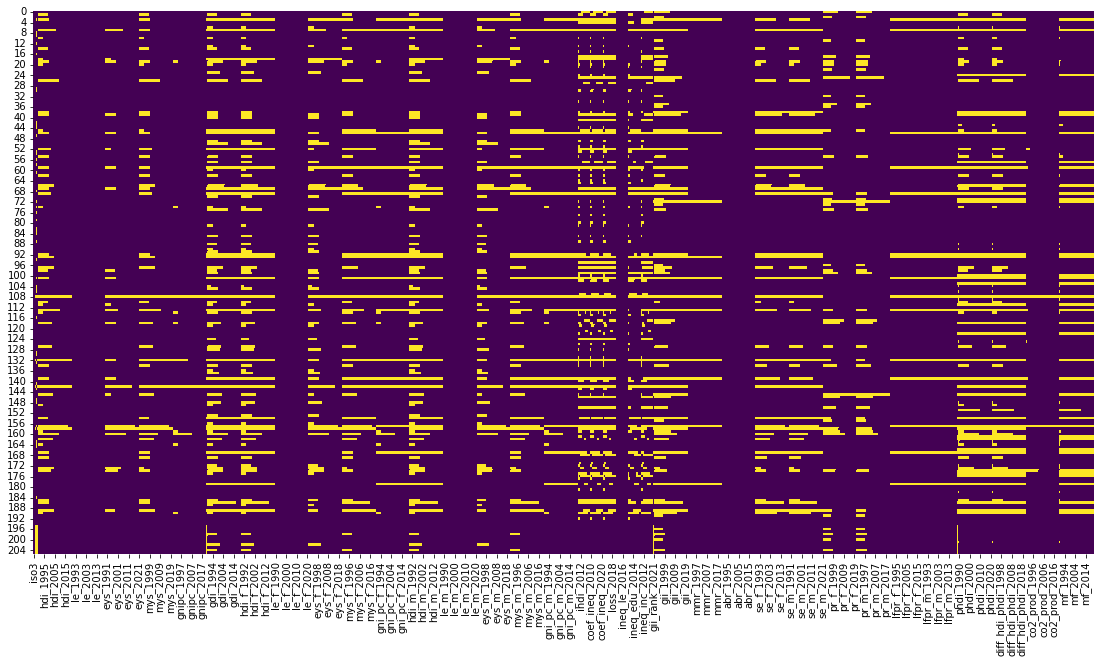

In [ ]:
plt.figure(figsize=(19, 10))

# setting the parameter values
#annot = True

sns.heatmap(hdrDF.isnull(),cbar=False,cmap='viridis')

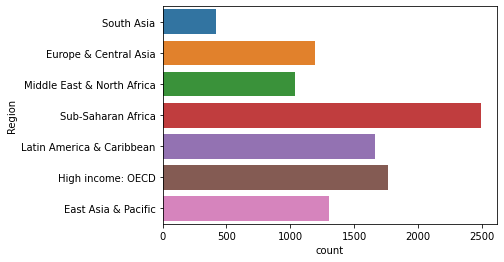

In [ ]:
# Plot of each categorical feature for wbl would only be region
data = wbl
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.countplot(y=column, data=data)
        plt.show()